In [1]:
import os
import glob
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../../../")

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from helpers.split import tag_label_feature_split, make_train_test_split
from helpers.assess import make_confusion_matrix, make_classification_report

In [2]:
def knn_experiment(dataset, n_neighbors=5):

    # load data and separate one hot encoded labels from features,
    # transform one hot encoded labels into label strings,
    # then encode label strings

    print(f"\n\nDataset: {dataset}\n")    
    
    df = pd.read_pickle(dataset)
    _, (y, le), X = tag_label_feature_split(df,label_format='encoded')

    # divide into train and test data sets
    X_train_std, X_test_std, y_train, y_test = make_train_test_split(
        X, y, test_size=0.2, random_state=10, stratify=y,x_scaler='standard'
    )

    model = KNeighborsClassifier(n_neighbors=n_neighbors)

    model.fit(X_train_std, y_train)

    predictions = model.predict(X_test_std)
    train_accuracy = model.score(X_train_std, y_train)
    test_accuracy = model.score(X_test_std, y_test)

    print(f"Train: {train_accuracy = :f}\n")
    make_classification_report(y_train, model=model,x=X_train_std, digits=4, label_encoder=le,print_report=True)
    print(f"Test: {test_accuracy = :f}\n")
    make_classification_report(y_test, y_pred=predictions, digits=4, label_encoder=le, print_report=True)
    
    # generate confusion matrix and
    # display nicely with seaborn
    name = os.path.basename(dataset).split(".")[0]
    make_confusion_matrix(
        y_test,
        y_pred=predictions,
        label_encoder=le,
        title=f"{name} test (row normalized)"
    )

    return model



Dataset: ../../../datasets/dataset_01_mean.pickle

Train: train_accuracy = 0.663759

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.4054  0.2807    0.3318      374  0.3252
  genre_classical     0.7605  0.9180    0.8319     4221  0.7761
    genre_country     0.6789  0.4526    0.5431      327  0.5474
      genre_disco     0.3569  0.3495    0.3531      289  0.3422
     genre_hiphop     0.5723  0.5632    0.5677     1701  0.5203
       genre_jazz     0.5589  0.4738    0.5129     1241  0.4799
      genre_metal     0.7153  0.6346    0.6725      665  0.6613
        genre_pop     0.6128  0.6654    0.6380     4274  0.5113
     genre_reggae     0.6083  0.3528    0.4466      788  0.4443
       genre_rock     0.7179  0.6306    0.6714     3200  0.6035
                                                               
         accuracy                       0.6638    17080  0.5864
        macro avg

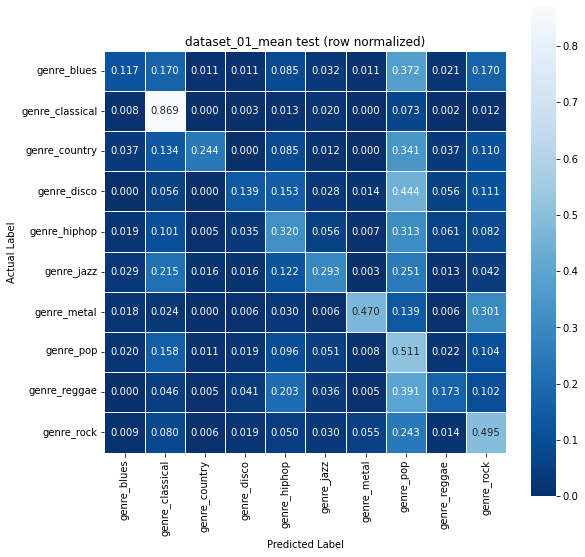



Dataset: ../../../datasets/dataset_02_mean_cov.pickle

Train: train_accuracy = 0.706089

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.5000  0.3529    0.4138      374  0.4093
  genre_classical     0.7781  0.9256    0.8455     4221  0.7943
    genre_country     0.7429  0.5566    0.6364      327  0.6371
      genre_disco     0.3763  0.3841    0.3801      289  0.3694
     genre_hiphop     0.6782  0.5750    0.6223     1701  0.5868
       genre_jazz     0.6520  0.5858    0.6171     1241  0.5898
      genre_metal     0.7060  0.6391    0.6709      665  0.6591
        genre_pop     0.6567  0.7050    0.6800     4274  0.5687
     genre_reggae     0.7454  0.5609    0.6401      788  0.6321
       genre_rock     0.7352  0.6697    0.7009     3200  0.6369
                                                               
         accuracy                       0.7061    17080  0.6390
        macro

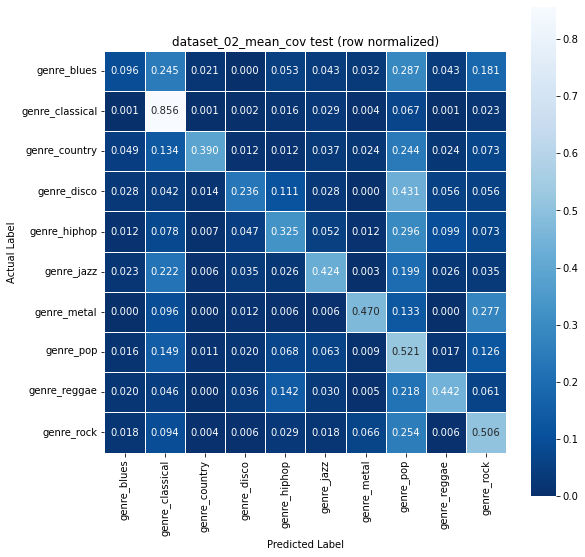



Dataset: ../../../datasets/dataset_03_mean_icov.pickle

Train: train_accuracy = 0.663700

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.4047  0.2781    0.3296      374  0.3233
  genre_classical     0.7608  0.9176    0.8318     4221  0.7759
    genre_country     0.6789  0.4526    0.5431      327  0.5474
      genre_disco     0.3556  0.3495    0.3525      289  0.3415
     genre_hiphop     0.5720  0.5626    0.5673     1701  0.5199
       genre_jazz     0.5569  0.4730    0.5115     1241  0.4784
      genre_metal     0.7165  0.6346    0.6730      665  0.6619
        genre_pop     0.6129  0.6661    0.6384     4274  0.5118
     genre_reggae     0.6083  0.3528    0.4466      788  0.4443
       genre_rock     0.7180  0.6309    0.6717     3200  0.6037
                                                               
         accuracy                       0.6637    17080  0.5863
        macr

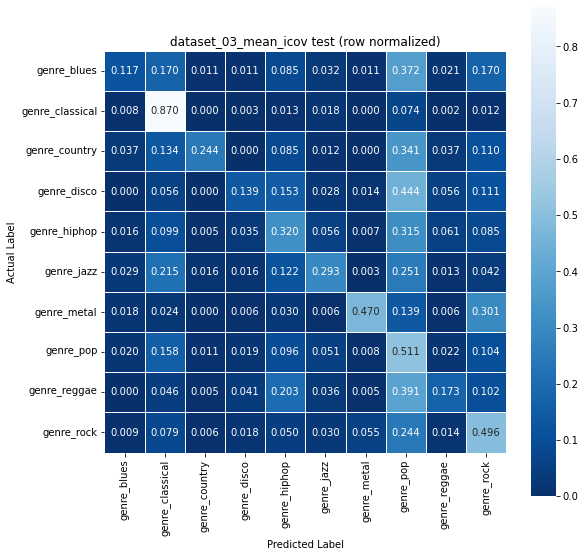



Dataset: ../../../datasets/dataset_04_mean_cov_icov.pickle

Train: train_accuracy = 0.706089

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.5000  0.3529    0.4138      374  0.4093
  genre_classical     0.7787  0.9254    0.8457     4221  0.7946
    genre_country     0.7429  0.5566    0.6364      327  0.6371
      genre_disco     0.3763  0.3841    0.3801      289  0.3694
     genre_hiphop     0.6782  0.5750    0.6223     1701  0.5868
       genre_jazz     0.6506  0.5866    0.6169     1241  0.5895
      genre_metal     0.7060  0.6391    0.6709      665  0.6591
        genre_pop     0.6566  0.7050    0.6799     4274  0.5686
     genre_reggae     0.7454  0.5609    0.6401      788  0.6321
       genre_rock     0.7352  0.6697    0.7009     3200  0.6369
                                                               
         accuracy                       0.7061    17080  0.6390
        

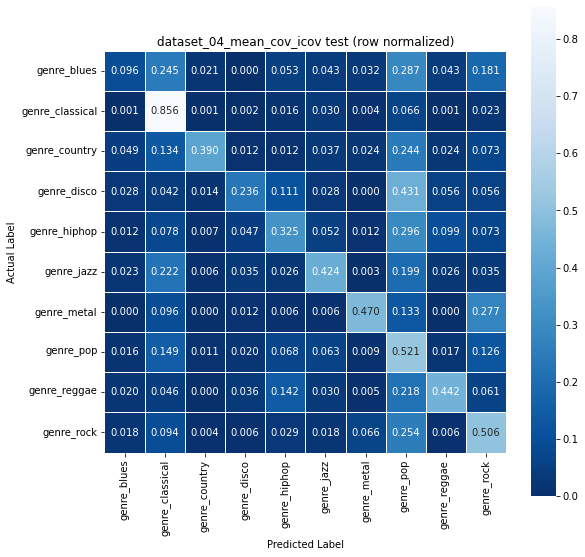



Dataset: ../../../datasets/dataset_05_pvtt.pickle

Train: train_accuracy = 0.633899

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.2949  0.2460    0.2682      374  0.2544
  genre_classical     0.8109  0.9022    0.8541     4221  0.8048
    genre_country     0.4093  0.3242    0.3618      327  0.3533
      genre_disco     0.4144  0.3183    0.3601      289  0.3537
     genre_hiphop     0.5013  0.5755    0.5359     1701  0.4820
       genre_jazz     0.5616  0.4738    0.5140     1241  0.4814
      genre_metal     0.5974  0.4105    0.4866      665  0.4787
        genre_pop     0.5760  0.6490    0.6103     4274  0.4713
     genre_reggae     0.5222  0.3135    0.3918      788  0.3830
       genre_rock     0.6566  0.5837    0.6180     3200  0.5376
                                                               
         accuracy                       0.6339    17080  0.5498
        macro avg

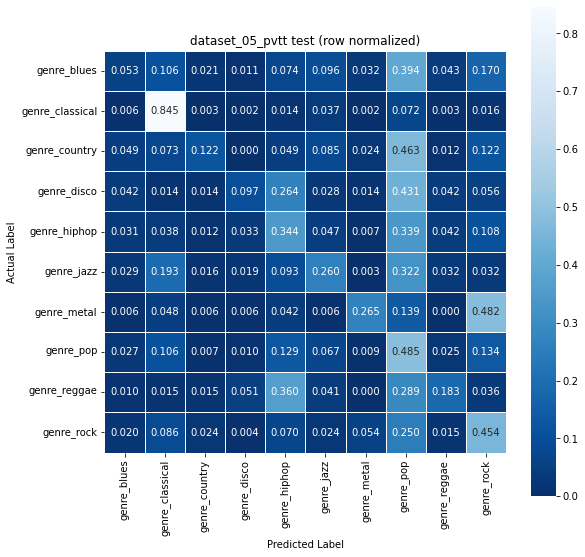



Dataset: ../../../datasets/dataset_06_pvtt_mean.pickle

Train: train_accuracy = 0.700527

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.4395  0.2914    0.3505      374  0.3464
  genre_classical     0.8274  0.9244    0.8732     4221  0.8308
    genre_country     0.6824  0.4862    0.5679      327  0.5692
      genre_disco     0.4476  0.4429    0.4452      289  0.4357
     genre_hiphop     0.6057  0.6349    0.6200     1701  0.5770
       genre_jazz     0.6073  0.5334    0.5680     1241  0.5378
      genre_metal     0.7145  0.6586    0.6854      665  0.6738
        genre_pop     0.6350  0.7043    0.6679     4274  0.5506
     genre_reggae     0.6820  0.4518    0.5435      788  0.5382
       genre_rock     0.7445  0.6628    0.7013     3200  0.6388
                                                               
         accuracy                       0.7005    17080  0.6324
        macr

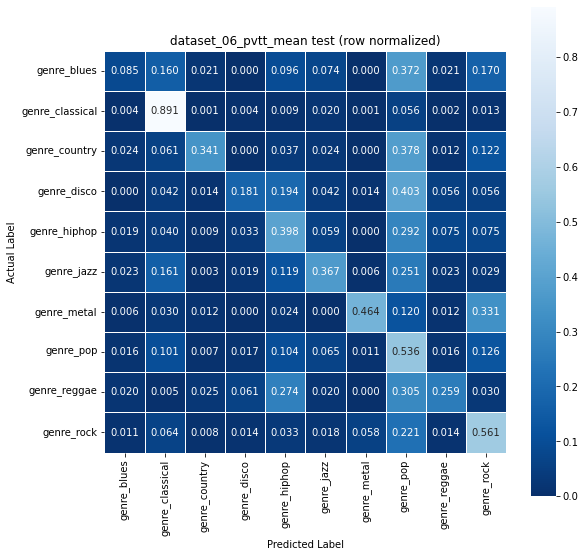



Dataset: ../../../datasets/dataset_07_pvtt_mean_cov.pickle

Train: train_accuracy = 0.722658

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.4966  0.3850    0.4337      374  0.4263
  genre_classical     0.8211  0.9299    0.8721     4221  0.8296
    genre_country     0.7400  0.5657    0.6412      327  0.6411
      genre_disco     0.3720  0.4221    0.3955      289  0.3852
     genre_hiphop     0.6785  0.5944    0.6337     1701  0.5977
       genre_jazz     0.6670  0.6180    0.6416     1241  0.6152
      genre_metal     0.7063  0.6436    0.6735      665  0.6617
        genre_pop     0.6650  0.7305    0.6962     4274  0.5895
     genre_reggae     0.7395  0.5799    0.6501      788  0.6404
       genre_rock     0.7595  0.6819    0.7186     3200  0.6594
                                                               
         accuracy                       0.7227    17080  0.6599
        

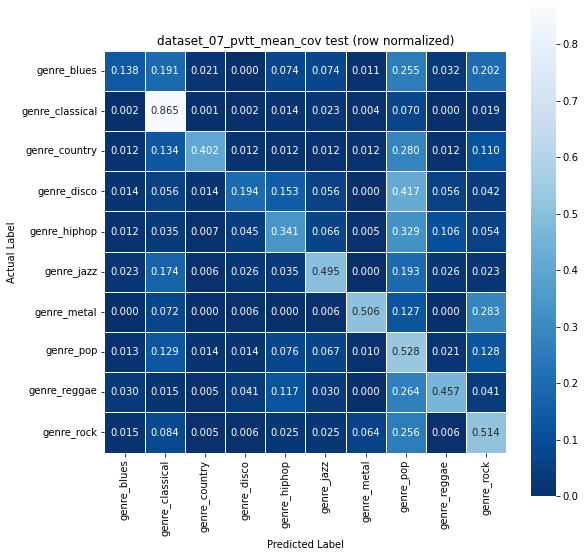



Dataset: ../../../datasets/dataset_08_pvtt_mean_icov.pickle

Train: train_accuracy = 0.700703

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.4395  0.2914    0.3505      374  0.3464
  genre_classical     0.8276  0.9244    0.8733     4221  0.8310
    genre_country     0.6824  0.4862    0.5679      327  0.5692
      genre_disco     0.4476  0.4429    0.4452      289  0.4357
     genre_hiphop     0.6059  0.6355    0.6204     1701  0.5775
       genre_jazz     0.6079  0.5334    0.5682     1241  0.5381
      genre_metal     0.7157  0.6586    0.6860      665  0.6744
        genre_pop     0.6349  0.7040    0.6677     4274  0.5504
     genre_reggae     0.6820  0.4518    0.5435      788  0.5382
       genre_rock     0.7447  0.6637    0.7019     3200  0.6396
                                                               
         accuracy                       0.7007    17080  0.6326
       

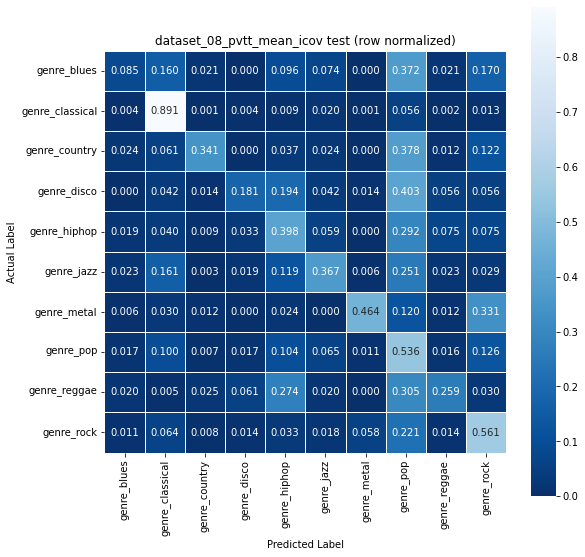



Dataset: ../../../datasets/dataset_09_pvtt_mean_cov_icov.pickle

Train: train_accuracy = 0.722658

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.4966  0.3850    0.4337      374  0.4263
  genre_classical     0.8211  0.9299    0.8721     4221  0.8296
    genre_country     0.7400  0.5657    0.6412      327  0.6411
      genre_disco     0.3720  0.4221    0.3955      289  0.3852
     genre_hiphop     0.6785  0.5944    0.6337     1701  0.5977
       genre_jazz     0.6670  0.6180    0.6416     1241  0.6152
      genre_metal     0.7063  0.6436    0.6735      665  0.6617
        genre_pop     0.6650  0.7305    0.6962     4274  0.5895
     genre_reggae     0.7395  0.5799    0.6501      788  0.6404
       genre_rock     0.7595  0.6819    0.7186     3200  0.6594
                                                               
         accuracy                       0.7227    17080  0.6599
   

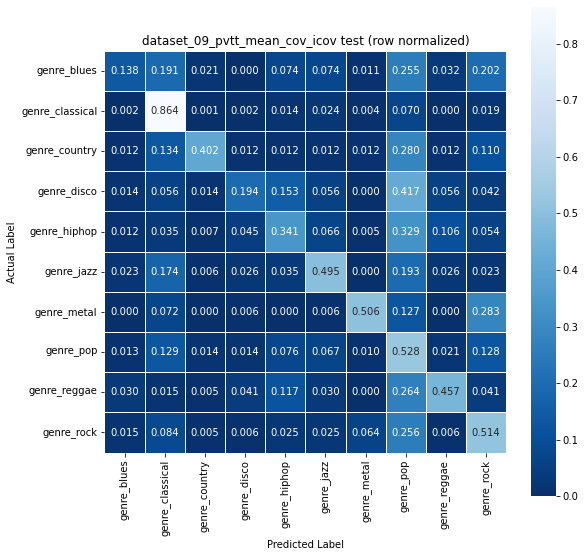



Dataset: ../../../datasets/dataset_10_melspecs_flattened.pickle

Train: train_accuracy = 0.485304

                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.4490  0.1176    0.1864      374  0.2217
  genre_classical     0.4891  0.9666    0.6495     4221  0.5481
    genre_country     0.3333  0.0336    0.0611      327  0.1009
      genre_disco     0.9231  0.1246    0.2195      289  0.3361
     genre_hiphop     0.8786  0.1064    0.1898     1701  0.2874
       genre_jazz     0.7263  0.1112    0.1929     1241  0.2671
      genre_metal     0.2356  0.6571    0.3468      665  0.3548
        genre_pop     0.6347  0.2960    0.4037     4274  0.3226
     genre_reggae     1.0000  0.0114    0.0226      788  0.1044
       genre_rock     0.4839  0.6525    0.5557     3200  0.4419
                                                               
         accuracy                       0.4853    17080  0.3791
   

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


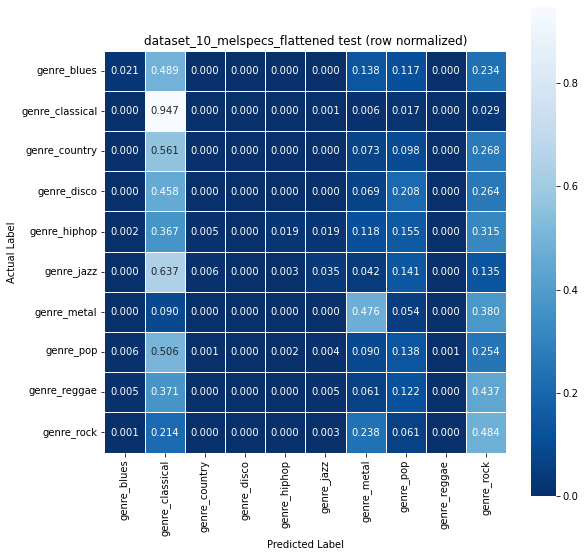

In [3]:
dataset_folder = "../../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])
for dataset in datasets:
    knn_experiment (dataset)